# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Write your code here to read the data
raw_data = pd.read_csv('foodhub_order.csv')

In [5]:
# Write your code here to view the first 5 rows
raw_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
raw_data.shape
print(f'There are {raw_data.shape[0]} rows.')
print(f'There are {raw_data.shape[1]} columns.')

There are 1898 rows.
There are 9 columns.


#### Observations:
This data set contains 1898 rows and 9 columns. 


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
This data set in its raw form has 4 features that are integers, 4 that are objects, and one feature that is a float. A review of the features that are objects the "rating" column should probably be an integer. From examining the head of the data shoiws that some rows have "Not given" in the "ratings" column. These are missing values and need to be addressed.  


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
null_values = raw_data.isnull().sum()
print(null_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [9]:
raw_data.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

In [10]:
raw_data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [11]:
working_data = raw_data.copy()

In [12]:
working_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [13]:
working_data['rating'] = working_data['rating'].replace('Not given', np.nan)

# ['B'] = df['B'].replace('not available', np.nan)

In [14]:
working_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer_num = SimpleImputer(strategy='mean')

In [17]:
working_data[['rating']] = imputer_num.fit_transform(working_data[['rating']]).astype(int)

In [18]:
working_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [19]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int32  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 126.2+ KB


#### Observations:

Yes, there are missing values in the dataset. Under the "ratings" column therr were "Not given" responses. These values are missing and filled using SciKit Learn Simpleimputer.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [20]:
# Write your code here
working_data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,4.210748e+00,0.603845,3.00,4.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
**food_preparation_time**

minimum: 20 minutes

average: 27 minutes

maximum: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [26]:
# Write the code here
count_notgiven = raw_data['rating'].value_counts().get('Not given')
print(count_notgiven)

736


#### Observations:
There were 736 rows where a rating was niot given. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### cost_of_the_order

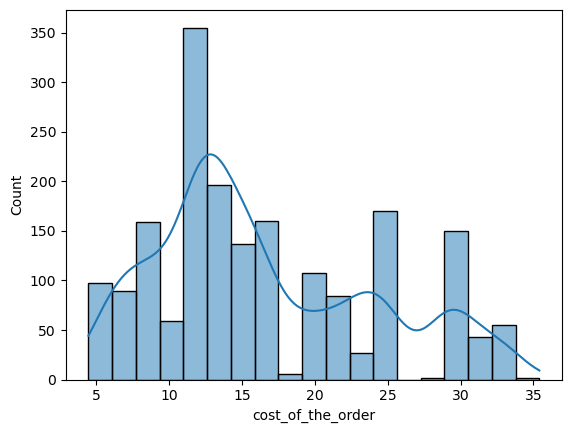

In [32]:
# Write the code here working_data
sns.histplot(data=working_data['cost_of_the_order'], kde=True) ;

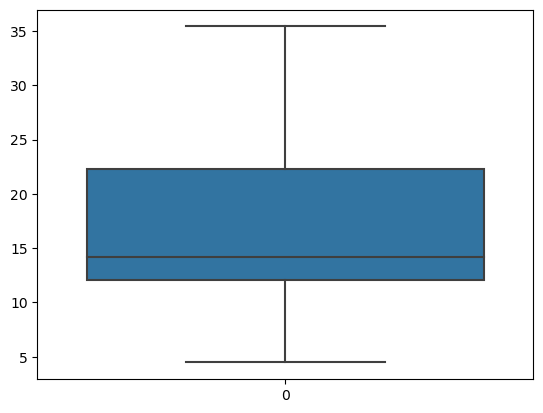

In [37]:
sns.boxplot(data=working_data['cost_of_the_order']);

#### rating

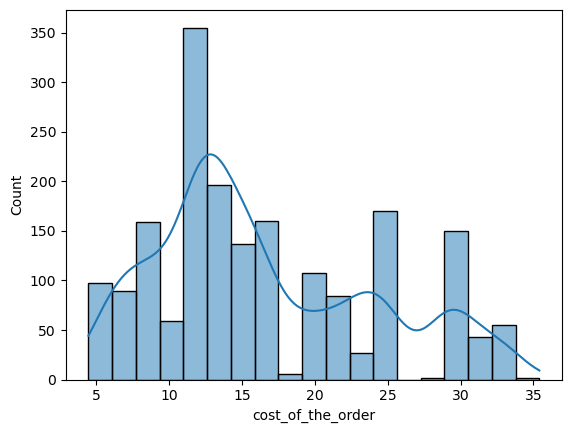

In [33]:
sns.histplot(data=working_data['cost_of_the_order'], kde=True);

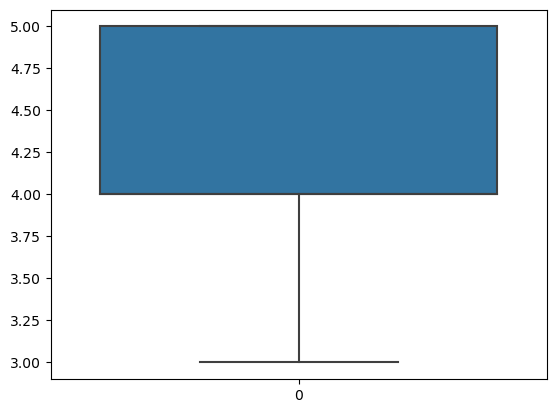

In [38]:
sns.boxplot(data=working_data['rating']);

#### food_preparation_time

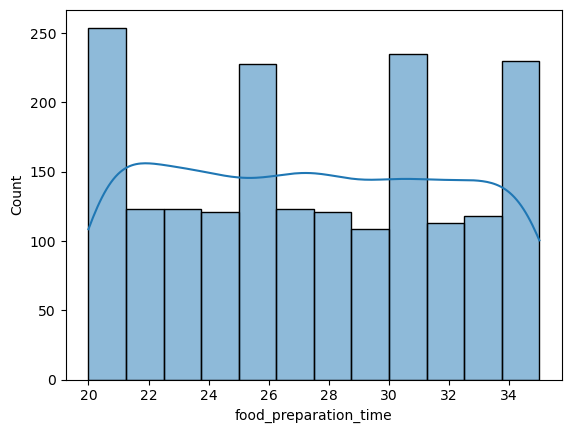

In [35]:
sns.histplot(data=working_data['food_preparation_time'], kde=True);

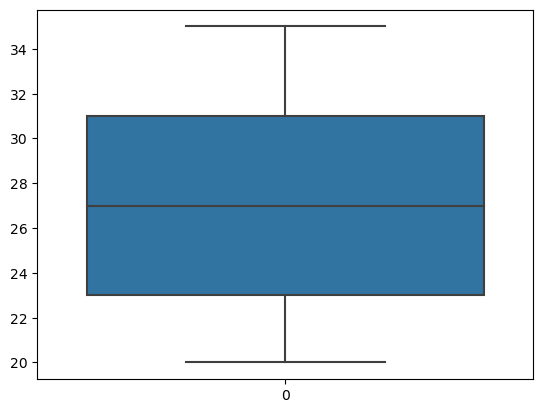

In [39]:
sns.boxplot(data=working_data['food_preparation_time']);

#### delivery_time

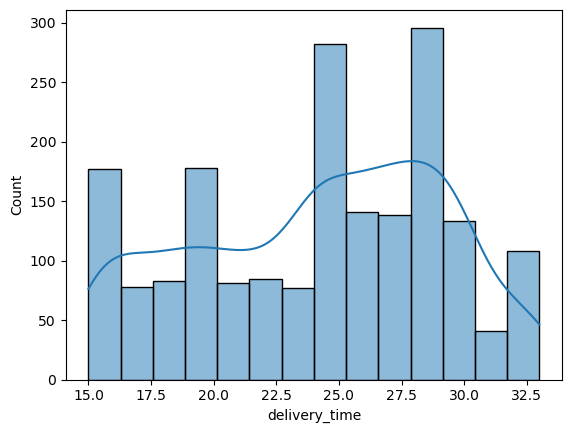

In [36]:
sns.histplot(data=working_data['delivery_time'], kde=True);

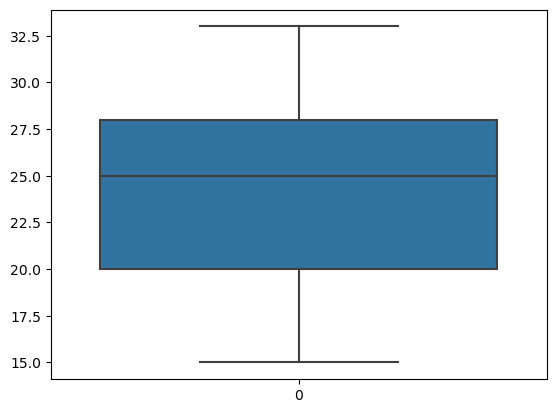

In [40]:
sns.boxplot(data=working_data['delivery_time']);

#### cuisine_type

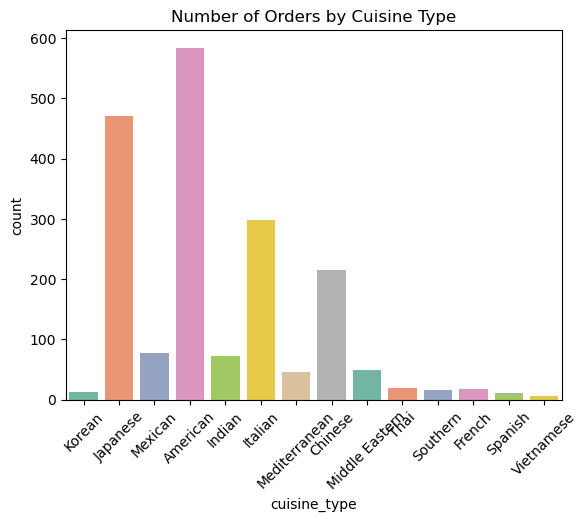

In [144]:
plt.xticks(rotation=45)
sns.countplot(data=working_data, x='cuisine_type', palette='Set2')
#plt.title('Number of Orders by Cuisine Type');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [151]:
top_5 = working_data.groupby('restaurant_name')['order_id'].count().reset_index()
top_5.columns = ['restaurant_name', 'order_count']
top_5_restaurants = top_5.sort_values(by='order_count', ascending=False).head()
print(top_5_restaurants)

               restaurant_name  order_count
136                Shake Shack          219
153          The Meatball Shop          132
21           Blue Ribbon Sushi          119
20   Blue Ribbon Fried Chicken           96
109                       Parm           68


#### Observations:
Shake Shack has the most orders for this time frame, with a large lead of the second place restaurant, The Meatball Shop. The number of orders per restaurant start to decrease rapidly after the top 5. 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [163]:
weekend_orders = working_data[working_data['day_of_the_week'].str.contains('Weekend')].copy()
weekend_orders

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,4,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,Weekend,4,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,4,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [171]:
popular_cuisine = weekend_orders.groupby('cuisine_type')['order_id'].count().reset_index()
popular_cuisine.columns = ['cuisine', 'order_count']
most_popular_cuisine = popular_cuisine.sort_values(by='order_count', ascending=False).head(1)
most_popular_cuisine

,cuisine,order_count
0,American,415


#### Observations:
The most poular cuisine on the weekend is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [177]:
# Write the code here - working_data
total_orders = len(working_data)
above_20 = len(working_data[working_data['cost_of_the_order'] > 20])
percent_above_20 = (above_20 / total_orders) * 100
percent_above_20

29.24130663856691

#### Observations:


In [183]:
print(f"Percentage of orders costing more than $20: {percent_above_20:.1f}%")

Percentage of orders costing more than $20: 29.2%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [180]:
# Write the code here
mean_delivery_time = working_data['delivery_time'].mean()
mean_delivery_time

24.161749209694417

#### Observations:


In [184]:
print(f"Mean order delivery time: {mean_delivery_time:.1f} minutes")

Mean order delivery time: 24.2 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [185]:
# Write the code here
customer_orders = working_data.groupby('customer_id')['order_id'].count().reset_index()
customer_orders.columns = ['customer_id', 'order_count']
top_customers = customer_orders.nlargest(3, 'order_count')

#### Observations:


In [186]:
print("Top 3 most frequent customers and their order counts:")
print(top_customers)

Top 3 most frequent customers and their order counts:
     customer_id  order_count
116        52832           13
84         47440           10
333        83287            9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [188]:
# Write the code here -  working_data
working_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [217]:
corr_df = working_data.copy()

In [222]:
corr_df.drop(columns=['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'day_of_the_week'], inplace=True)
corr_df

,cost_of_the_order,rating,food_preparation_time,delivery_time
0,30.75,4,25,20
1,12.08,4,25,23
2,12.23,5,23,28
3,29.20,3,25,15
4,11.59,4,25,24
...,...,...,...,...
1893,22.31,5,31,17
1894,12.18,5,31,19
1895,25.22,4,31,24
1896,12.18,5,23,31


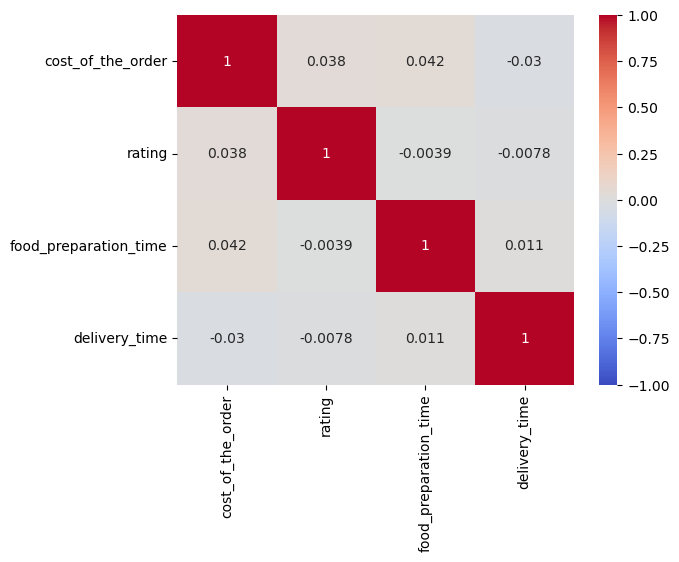

In [234]:
sns.heatmap(data=cdm, cmap='coolwarm', vmin=-1, vmax=1, annot=True);

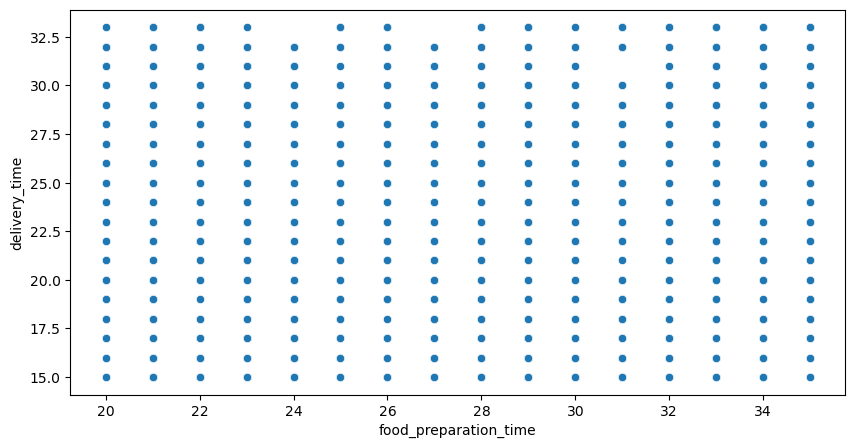

In [237]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=raw_data,x='food_preparation_time',y='delivery_time')
plt.show()

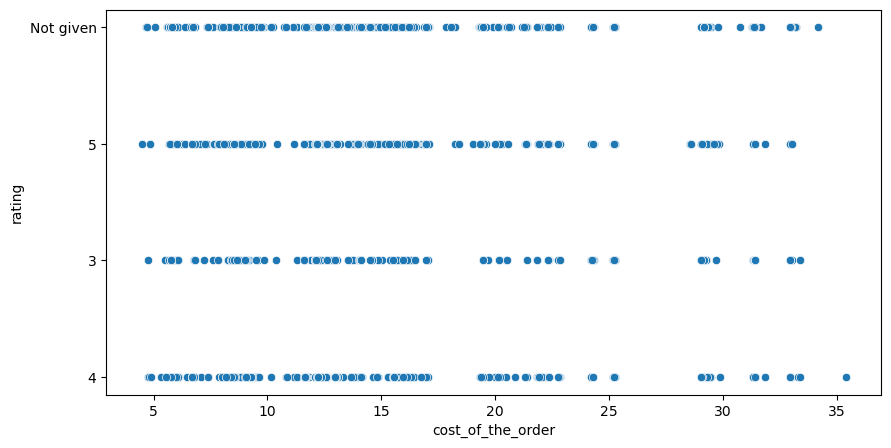

In [238]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=raw_data,x='cost_of_the_order',y='rating')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [248]:
# rating_count
# average_rating
average_ratings = working_data.groupby('restaurant_name').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# print(average_ratings)


qualified_restaurants = average_ratings[
    (average_ratings['rating_count'] > 50) & (average_ratings['average_rating'] > 4)
]

print("Restaurants meeting this criteriainclude: ")
print()
print(qualified_restaurants)


Restaurants meeting this criteriainclude: 

               restaurant_name  average_rating  rating_count
20   Blue Ribbon Fried Chicken        4.218750            96
21           Blue Ribbon Sushi        4.134454           119
109                       Parm        4.073529            68
121           RedFarm Broadway        4.169492            59
122             RedFarm Hudson        4.109091            55
136                Shake Shack        4.168950           219
153          The Meatball Shop        4.325758           132


#### Observations:
There only 7 restaurants that meet the criteria for this special promotional offer. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [250]:
# Write the code here - use an if block 
net_revenue = 0 

def calculate_revenue(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25 
    elif cost_of_the_order > 5:
        return cost_of_the_order * 0.15  
    else:
        return 0


working_data['revenue'] = working_data['cost_of_the_order'].apply(calculate_revenue)

total_revenue = working_data['revenue'].sum()

print("Net revenue generated by the company across all orders:")
print(total_revenue)

Net revenue generated by the company across all orders:
6166.303


#### Observations:
The $6,166.30 over the time period of the dataset. 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [270]:
# Write the code here
working_data['total_time'] = working_data['food_preparation_time'] + working_data['delivery_time']
order_count = working_data['total_time'].count()
over_60 = (working_data['total_time'] > 60).sum()

# print(order_count)
# print(over_60)

percent_over_60 = (over_60 / order_count) * 100
print(percent_over_60)

10.537407797681771


#### Observations:


In [276]:
print(f"The are about {percent_over_60:.1f}% took over 60 minutes total time to be delivery")

The are about 10.5% took over 60 minutes total time to be delivery


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [282]:
# Write the code here
mean_delivery_time = working_data.groupby('day_of_the_week')['delivery_time'].mean().reset_index()
mean_delivery_time

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


#### Observations:


Orders on the weekend are delivered 6 minutes ealrier than on a weekday. There is not enough data to determine the reason

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The majority of the orders are from a limited number of stores. 

### Recommendations:

*  More data is needed. I think they examine the cudstomer demographics of the highest order stores and see if there is any commonality. If there is some common factors address this group of people. 

---